In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob
from plots import jsd, wDist, kls, js, getDists, plotDists, plot_wdist_xyz, compare_avg_wDist

setGPU: Setting GPU to: 0


# Evaluation of the model per step, using the Wasserstein Distance, KL divergence, and JS divergence

In [2]:
f_name = '/mnt/ceph/users/vbarinpa/single_particle/all_noPU.h5'
#f_name = '/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5'

In [3]:
gen_model1 = '../trial37/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
all_g_weight1 = '../trial37/weights/generator_weights_step_*.h5'

## Model with energy constraint and normalized energy regression

In [4]:
w_dist, kls, jss = getDists(all_g_weight1, gen_model1, f_name)

Using TensorFlow backend.
/mnt/home/vbarinpa/hgcal_wgan/notebooks/plots.py:488: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(a != 0, a * np.log(a / b), 0))
/mnt/home/vbarinpa/hgcal_wgan/notebooks/plots.py:488: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(a != 0, a * np.log(a / b), 0))


### Mean of the distance scores in {x, y, z} axes

WD = Wasserstein distance

KL = Kullback-Leibler divergence

JS = Jensen-Shannon divergence

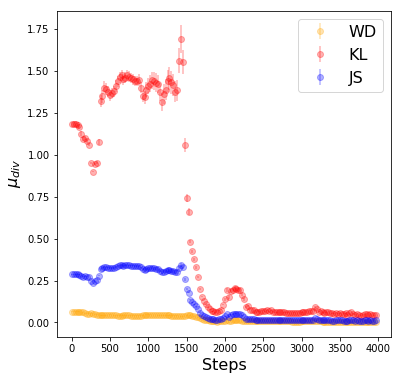

In [5]:
plt.figure(figsize=(6, 6))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='WD')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
#plt.yscale('log')

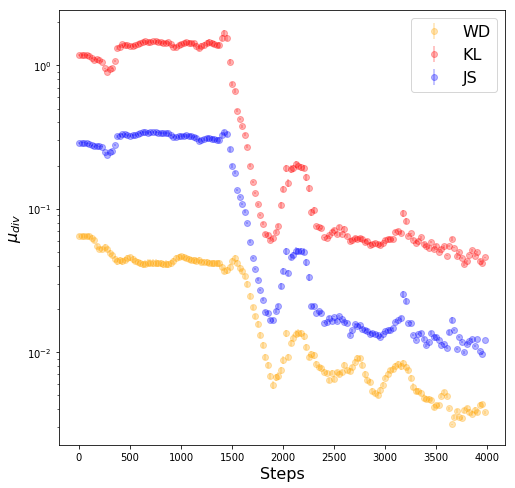

In [6]:
plt.figure(figsize=(8, 8))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='WD')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

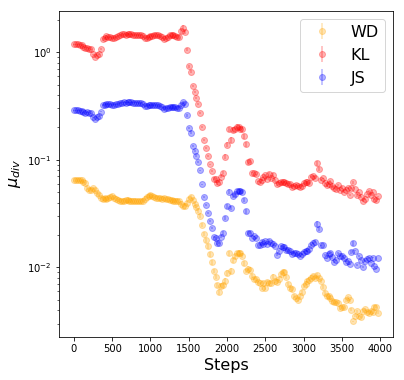

In [14]:
plotDists(w_dist, kls, jss)

In [42]:
# plt.figure(figsize=(7, 7))

# plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
# plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
# plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

# plt.xlabel("Steps", size=16)
# plt.ylabel(r"$\mu_{div}$", size=16)
# plt.legend()
# plt.yscale('log')

# plt.ylim(0.001, 0.1)
# plt.xlim(1500, 4000)

### Wasserstein distance scores per axis

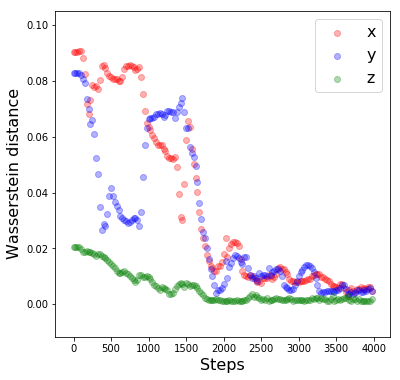

In [8]:
plt.figure(figsize=(6, 6))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
#plt.yscale('log')

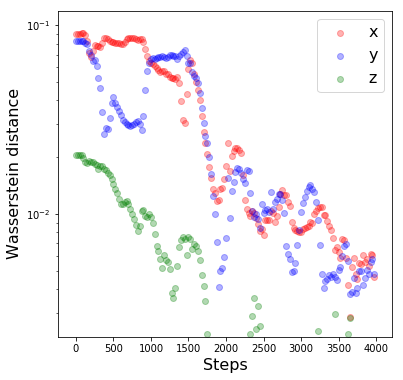

In [21]:
plot_wdist_xyz(w_dist)

(0.001, 0.05)

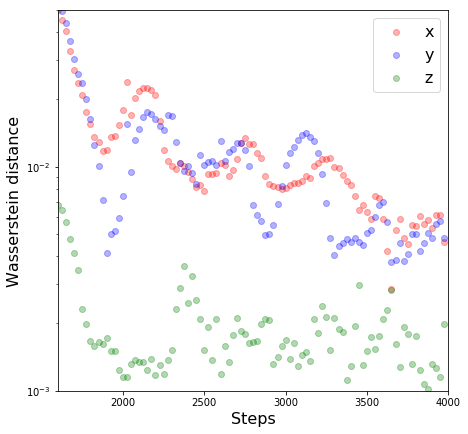

In [10]:
plt.figure(figsize=(7, 7))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

plt.xlim(1600, 4000)
plt.ylim(0.001, 0.05)

## Model without energy constraint and without regression

In [27]:
gen_model2 = '../trial32/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
all_g_weight2 = '../trial32/weights/generator_weights_*'

In [28]:
w_dist2, kls2, jss2 = getDists(all_g_weight2, gen_model2, f_name)

/mnt/home/vbarinpa/hgcal_wgan/notebooks/plots.py:488: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(a != 0, a * np.log(a / b), 0))
/mnt/home/vbarinpa/hgcal_wgan/notebooks/plots.py:488: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(a != 0, a * np.log(a / b), 0))


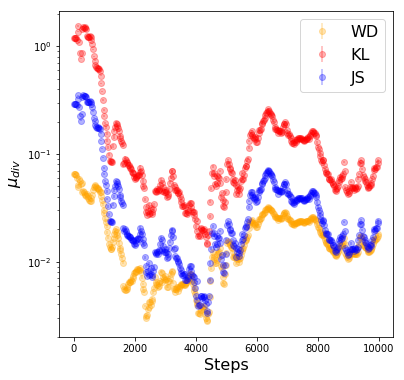

In [29]:
plotDists(w_dist2, kls2, jss2)

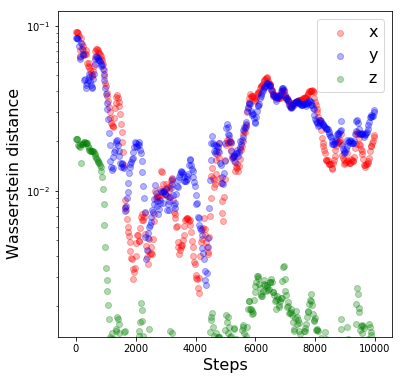

In [30]:
plot_wdist_xyz(w_dist2)

# Comparing the two models

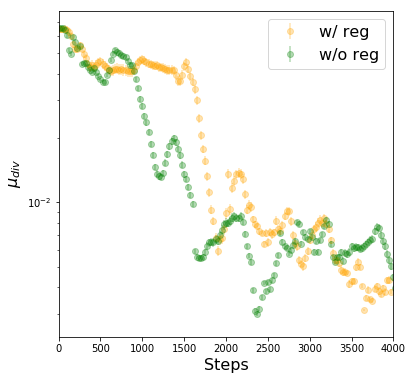

In [33]:
compare_avg_wDist(w_dist, w_dist2)